### Fourier Transform

$$
\mathcal{F}\left\{ f(x)\right\} = \hat{f}(\xi)
$$

### Time Domain Shifting

$$
\mathcal{F}\left\{ f(x - a) \right\} = e^{-2 \pi i a} \hat{f}(\xi) 
$$

### Frequency Domain Shifting

$$
\mathcal{F}\left\{ e^{2 \pi i a}f(x) \right\} =  \hat{f}(\xi-a) 
$$

### Modified Discrete Cosine Transform

- Analysis Filter:
$$
h_k(L-1-n) = h(n)cos(\frac{\pi}{N}(k+\frac{1}{2})(n+\frac{1}{2}-\frac{N}{2}))\sqrt{\frac{2}{N}}
$$
- Synthesis Filter:
$$
g_k(n) = g(n)cos(\frac{\pi}{N}(k+\frac{1}{2})(n+\frac{1}{2}-\frac{N}{2}))\sqrt{\frac{2}{N}}
$$

$$
\begin{cases}
\text{ for } & n = 0,\cdots,2N-1 \\
\text{ for } & k = 0,\cdots,N-1 \\
\end{cases}
$$



In [1]:
import scipy
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

def butter_bandpass(lowcut, highcut, fs, order=5, label=None):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = signal.butter(order, [low, high], btype='band', output='sos')
    w, h = signal.sosfreqz(sos,worN=20000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label=label)
    return sos

center_freqs = np.array([0.5 * 2 ** (n * 1 / 3.) for n in range(0, 29)])
print(center_freqs)
center_freqs.sort()
print(center_freqs)
# lower_freqs = 2. ** (-1 / 6.) * center_freqs

# for lf in lower_freqs:
#     butter_bandpass(lf, lf*2**(1/3.), fs=48000, order=5)

# # plt.xlim(20,24000)
# plt.show()

[  0.5          0.62996052   0.79370053   1.           1.25992105
   1.58740105   2.           2.5198421    3.1748021    4.
   5.0396842    6.34960421   8.          10.0793684   12.69920842
  16.          20.1587368   25.39841683  32.          40.3174736
  50.79683366  64.          80.63494719 101.59366733 128.
 161.26989439 203.18733465 256.         322.53978877]
[  0.5          0.62996052   0.79370053   1.           1.25992105
   1.58740105   2.           2.5198421    3.1748021    4.
   5.0396842    6.34960421   8.          10.0793684   12.69920842
  16.          20.1587368   25.39841683  32.          40.3174736
  50.79683366  64.          80.63494719 101.59366733 128.
 161.26989439 203.18733465 256.         322.53978877]


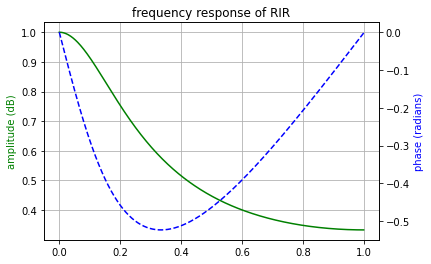

In [2]:
b = [0.5]
a = [1, -0.5]

w, h = signal.freqz(b, a)

# amplitude = 20 * np.log10(abs(h))
amplitude = abs(h)
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of RIR')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
# ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

# plt.xscale("log")
plt.show()

In [3]:
fc = 0.2

A = 0.5
B = np.sqrt((np.cos(fc * np.pi) - 0.5) ** 2 + np.sin(fc * np.pi) ** 2)

print(A/B)

0.752937760164676


In [4]:
A = 0.5 + 0j
B = 1 - 0.5 * np.exp(-np.pi * 1j * fc)
H = A / B

In [5]:
abs(H)

0.752937760164676

In [18]:
print(H.imag/H.real)
print(np.arctan(H.imag/H.real))

-0.4935295042131951
-0.45845782665894885


In [20]:
np.angle(H)

-0.4584578266589488

In [23]:
np.angle(1+1j, deg=True)

45.0